# PACIENTES INTERNADOS COM SÍNDROME RESPIRATÓRIA AGUDA ATÉ MAIO DE 2020 X ÓBITOS E CURADOS EM SP
<b>DATA DE EXTRAÇÃO DOS DADOS UTILIZADOS NESTA ANÁLISE: 18/05/2020.</b>
<li>FONTE: https://opendatasus.saude.gov.br/dataset/bd-srag-2020</li>
<li>DICIONÁRIOS DE DADOS: https://opendatasus.saude.gov.br/dataset/9bc2013f-f293-4f3e-94e7-fa76204fc035/resource/20e51b77-b129-4fd5-84f6-e9428ab5e286/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf </li>


ESTUDANTES: Débora Cristina Santos & Caroline Faria Nunes

<h2>ANÁLISES: </h2>    

<li>PACIENTES COVID-19 X HISTÓRICO DE VIAGEM</li>                   
<li>PACIENTES COM HISTÓRIO DE VIAGEM X RAÇA</li>             
<li>PACIENTES INTERNADOS X PACIENTES TESTADOS</li>             
<li>PACIENTES INTERNADOS X UTILIZAÇÃO DE UTI</li>
<li>PACIENTES TESTADOS X RESULTADOS DE EXAMES</li>
<li>PACIENTES COVID-19 X ÓBITOS</li>
<li>PACIENTES COVID-19 X CURADOS</li>
<li>PACIENTES ÓBITOS X SEXO</li>
<li>PACIENTES CURADOS X SEXO</li>
<li>PACIENTES COVID-19 x INTERNADOS NA UTI EM SP</li>
<li>PACIENTES INTERNADOS NA UTI COM COVID-19 X ÓBITOS EM SP</li>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [6]:
filename = r'/Users/deboracristina/Desktop/AnaliseSUS/CursoPyLadies/sraghosp_18.05.2020.xlsx'
df = pd.read_excel(filename)

In [17]:
df.shape

(157268, 140)

# Estados (UF) sendo considerados nesta análise e seus respectivos números de hospitalizados:

In [15]:
ocor = df.groupby(['HOSPITAL','SG_UF_NOT']).SG_UF_NOT.count().sort_values().reset_index(name="QUANTIDADE DE INTERNADOS")

est = ocor.drop_duplicates('SG_UF_NOT')
est.SG_UF_NOT
lista_temp=[]
for w in est.index:
    lista_por_cidade = ocor[(ocor.SG_UF_NOT == est.SG_UF_NOT[w])]
    lista_temp.append(lista_por_cidade.loc[lista_por_cidade['QUANTIDADE DE INTERNADOS'].idxmax()])

lt = pd.DataFrame(lista_temp)
lt = lt.sort_values(by='QUANTIDADE DE INTERNADOS', ascending=False)
lt

,HOSPITAL,SG_UF_NOT,QUANTIDADE DE INTERNADOS
75,1.0,SP,60510
74,1.0,RJ,17052
73,1.0,MG,9262
72,1.0,CE,8793
71,1.0,PE,7197
70,1.0,PR,7070
69,1.0,RS,5397
68,1.0,AM,4842
66,1.0,BA,3163
65,1.0,SC,2650


HOSPITAL = 1 Significa que o paciente foi internado

In [55]:
df.query('HOSPITAL == "1"')['SG_UF_NOT'].value_counts()

SP    60510
RJ    17052
MG     9262
CE     8793
PE     7197
PR     7070
RS     5397
AM     4842
BA     3163
SC     2650
PA     2239
DF     1928
GO     1664
PB     1536
PI     1465
MS     1428
MA     1192
ES     1029
RN     1006
MT      966
AL      551
TO      436
SE      424
RO      185
RR      120
AP      104
AC       96
Name: SG_UF_NOT, dtype: int64

## QUANTIDADE DE PACIENTES INTERNADOS COM HISTÓRICO DE VIAGEM NOS 14 DIAS ANTERIORES A INTERNAÇÃO POR ESTADO (UF)

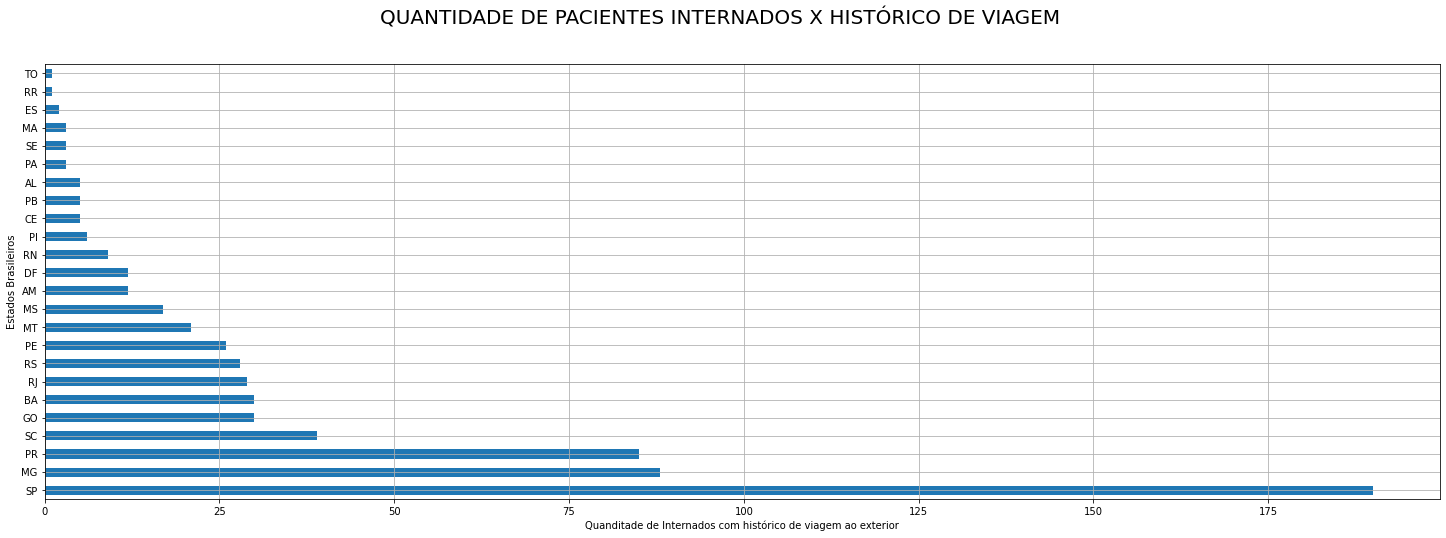

In [9]:
df.query('HOSPITAL == "1" and HISTO_VGM ==1')['SG_UF_NOT'].value_counts().plot(kind='barh',figsize=(25, 8))
plt.suptitle('QUANTIDADE DE PACIENTES INTERNADOS X HISTÓRICO DE VIAGEM', size=20)
plt.xlabel("Quanditade de Internados com histórico de viagem ao exterior")
plt.ylabel("Estados Brasileiros")
plt.grid(True)
plt.show()

In [59]:
df.query('HOSPITAL == 1 and HISTO_VGM == 1')['SG_UF_NOT'].value_counts()

SP    190
MG     88
PR     85
SC     39
BA     30
GO     30
RJ     29
RS     28
PE     26
MT     21
MS     17
DF     12
AM     12
RN      9
PI      6
PB      5
AL      5
CE      5
MA      3
SE      3
PA      3
ES      2
RR      1
TO      1
Name: SG_UF_NOT, dtype: int64

# Quantidade de pacientes viajantes por raça

Puxando por pacientes com histórico de viagem positivo nos 14 dias antecedentes a internação

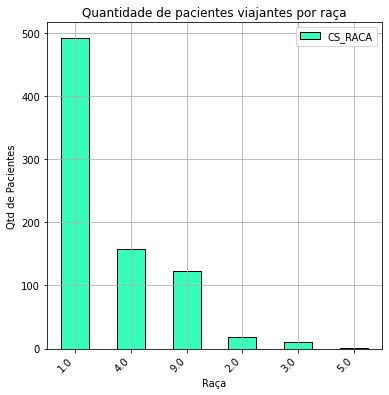

In [16]:
df.query('HISTO_VGM == "1"')['CS_RACA'].value_counts().plot(kind='bar', figsize=(6,6), color='#33ffbb', edgecolor='black')
plt.title('Quantidade de pacientes viajantes por raça')
plt.xlabel('Raça')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Qtd de Pacientes')
plt.legend(loc='best') 
plt.grid(True)
plt.show()

Legenda das raças: 1-Branca 2-Preta 3-Amarela 4-Parda 5-Indígena 9-Ignorado

# Quantidade de viajantes BRANCOS por países de destino

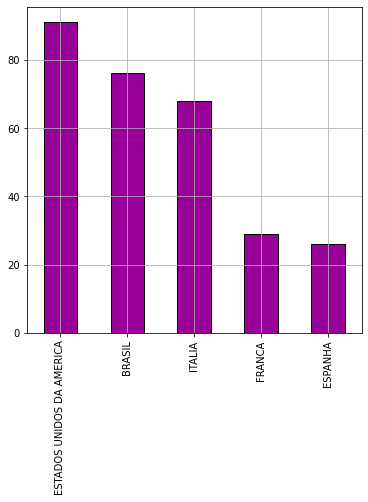

In [17]:
df.query('CS_RACA == "1.0"')['PAIS_VGM'].value_counts().head().plot(kind='bar', figsize=(6,6), color='#990099', edgecolor='black')
plt.grid(True)

# Quantidade de viajantes NEGROS por países de destino

In [33]:
df.query('CS_RACA == "2.0"')['PAIS_VGM'].value_counts().head()

BRASIL         11
ESPANHA         2
ARGENTINA       1
REINO UNIDO     1
SUICA           1
Name: PAIS_VGM, dtype: int64

# Dos pacientes internados, quantos foram testados?

In [73]:
df.query('HOSPITAL == "1"')['AMOSTRA'].value_counts()

1.0    131347
2.0      4433
9.0      1165
Name: AMOSTRA, dtype: int64

Dos pacientes internados, quem teve a amostra coletada para diagnóstico: 1-Sim 2-Não 9-Ignorado

# % CONSTANDO QUE EM MÉDIA 27% DOS MOTIVOS DE INTERNAÇÃO FORAM POR COVID-19 E OUTROS 27% POSSIVELMENTE TAMBÉM POR COVID-19:

<function matplotlib.pyplot.show(*args, **kw)>

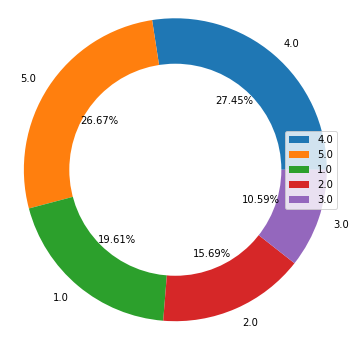

In [25]:
df1 = df.groupby(['SG_UF_NOT','CLASSI_FIN','HOSPITAL']).CLASSI_FIN.count().reset_index(name="QTD")
df1.CLASSI_FIN.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend='false' )
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.axis('off')
plt.legend(loc="right")
plt.show

<li>1-SRAG por influenza</li>
<li>2-SRAG por outro vírus respiratório</li>
<li>3-SRAG por outro agente Etiológico</li>
<li>4-SRAG não especificado</li>
<li>5-COVID-19</li>

# DOS PACIENTES INTERNADOS, QUANTOS FORAM INTERNADOS EM UTI?

In [83]:
df.query('HOSPITAL == "1"')['UTI'].value_counts()

2.0    85595
1.0    40980
9.0     3783
Name: UTI, dtype: int64

Legenda: 1-Sim 2-Não 9-Ignorado

# Dos pacientes testados, resultados dos testes: 
43.119 POSITIVOS PARA COVID-19

In [118]:
df.query('AMOSTRA == "1"')['CLASSI_FIN'].value_counts()

4.0    50485
5.0    43119
2.0     2246
1.0     1917
3.0      334
Name: CLASSI_FIN, dtype: int64

Legenda: 
1-SRAG por influenza 
2-SRAG por outro vírus respiratório 
3-SRAG por outro agente Etiológico, qual: 4-SRAG não especificado 
5-COVID-19

# Dos pacientes diagnosticados com covid-19, quantos tinham histórico de viagem ao exterior?
327 COM HISTÓRICO DE VIAGEM AO EXTERIOR

In [67]:
df.query('CLASSI_FIN == "5"')['HISTO_VGM'].value_counts().head()

2    29183
0     7936
9     6460
1      327
Name: HISTO_VGM, dtype: int64

Legenda: 1-Sim 2-Não 9-Ignorado

## DOS PACIENTES INTERNADOS COM COVID 19, QUANTOS FORAM CURADOS (TIVERAM ALTA)

In [84]:
total = df.query('EVOLUCAO == 1 and CLASSI_FIN == 5')['HOSPITAL'].count()
f'PACIENTES CURADOS DEPOIS DE INTERNADOS POR CORONA VÍRUS: {total}'

'PACIENTES CURADOS DEPOIS DE INTERNADOS POR CORONA VÍRUS: 16267'

## DOS PACIENTES INTERNADOS COM COVID 19, QUANTOS FORAM AO ÓBITO?

In [88]:
total = df.query('EVOLUCAO == 2 and CLASSI_FIN == 5')['HOSPITAL'].count()
f'PACIENTES QUE NÃO RESISTIRAM DEPOIS DE INTERNADOS POR CORONA VÍRUS: {total}'

'PACIENTES QUE NÃO RESISTIRAM DEPOIS DE INTERNADOS POR CORONA VÍRUS: 12949'

Quantidade de pacientes com o estado de evolução ignorado: 

In [89]:
total = df.query('EVOLUCAO == 9 and CLASSI_FIN == 5')['HOSPITAL'].count()
f'Pacientes com o estado de evolução ignorado: {total}'

'Pacientes com o estado de evolução ignorado: 2154'

## ÓBITOS X SEXO DOS PACIENTES

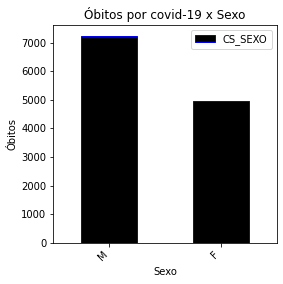

In [110]:
df.query('EVOLUCAO == 2 and CLASSI_FIN == 5 and HOSPITAL == 1')['CS_SEXO'].value_counts().plot(kind='bar', figsize=(4,4), color='#000000', edgecolor='blue')
plt.title('Óbitos por covid-19 x Sexo')
plt.xlabel('Sexo')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Óbitos')
plt.legend(loc='best') 
plt.show()

<b>7.253 homens </b> e <b>4.972 mulheres</b> diagnosticados com e internados por conta do covid-19 vieram a óbito. 

## CURADOS X SEXO DOS PACIENTES

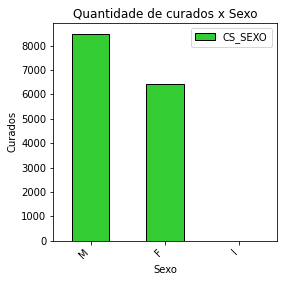

In [116]:
df.query('EVOLUCAO == 1 and CLASSI_FIN == 5 and HOSPITAL == 1')['CS_SEXO'].value_counts().plot(kind='bar', figsize=(4,4), color='#33cc33', edgecolor='black')
plt.title('Quantidade de curados x Sexo')
plt.xlabel('Sexo')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Curados')
plt.legend(loc='best') 
plt.show()

<b>8.499 homens, 6.431 mulheres e 3 pessoas com sexo indefinido foram curados </b>

## PACIENTES DIAGNOSTICADOS COM COVID-19 E INTERNADOS NA UTI EM SP

#### Por volta de 6.787 pessoas diagnosticadas com covid-19 em sp foram internadas em uti

In [125]:
x = df.query('HOSPITAL == 1 and CLASSI_FIN == 5 and SG_UF_NOT == "SP"')['UTI'].value_counts()

2.0    12516
1.0     6787
9.0      451
Name: UTI, dtype: int64

## PACIENTES QUE FORAM PARA UTI E FALECERAM EM SP

In [129]:
total = df.query('EVOLUCAO == 2 and CLASSI_FIN == 5 and SG_UF_NOT == "SP"')['UTI'].count()
f'DOS PACIENTES QUE PASSARAM PELA UTI COM COVID-19 E FORAM AO ÓBITO: {total}'' são de SP'

'DOS PACIENTES QUE PASSARAM PELA UTI COM COVID-19 E FORAM AO ÓBITO: 4735 são de SP'

## PACIENTES INTERNADOS NA UTI COM COVID-19 X ÓBITOS EM SP

In [148]:
x = 4.735 
y = 6.787
f'Cerca de {x*100/y}% dos pacientes que foram para UTI, chegaram ao óbito em SP'

'Cerca de 69.76572859879181% dos pacientes que foram para UTI, chegaram ao óbito em SP'